### import necessary package

In [891]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Image Path
- read image
- convert image into gray scale image

In [892]:
image_path = "car_6.jpg"

In [893]:
#read image
image = cv2.imread(image_path)
#convert image from bgr to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Plot images
- original image
- gray Image
- Blur Image
- Edge detection

In [894]:
#Plot images
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    
    #for original image
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    #for gray iamge
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

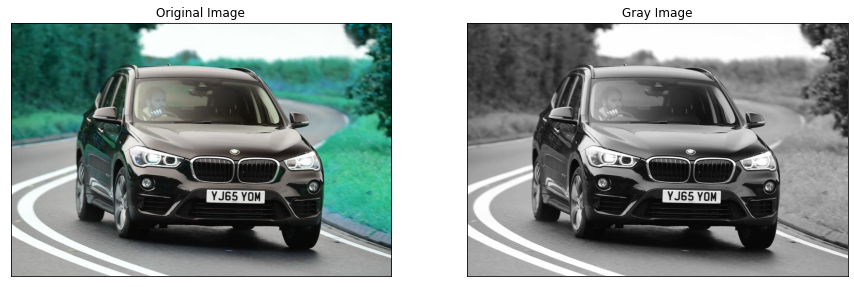

In [895]:
#plot original image and gray image
plot_images(image, gray,title1='Original Image',title2='Gray Image')

In [896]:
#remove noice and other redundant features
blur = cv2.bilateralFilter(gray, 11,90, 90)

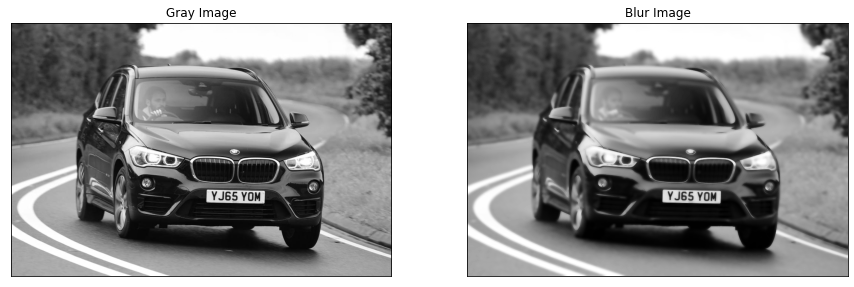

In [897]:
#plot original image and blur image
plot_images(gray, blur,title1='Gray Image',title2='Blur Image')

In [898]:
# for better accuracy applied canny edge detection
edges = cv2.Canny(blur, 30, 200)

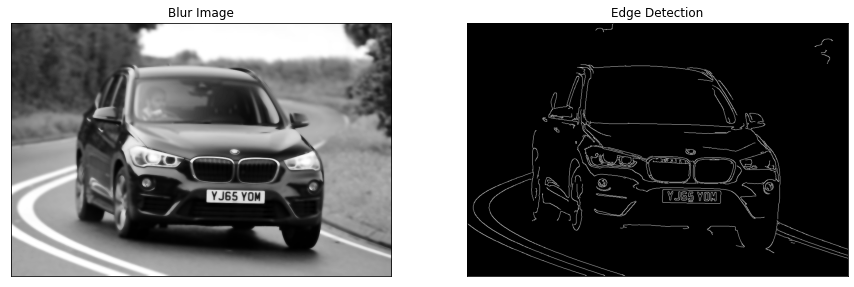

In [899]:
#plot blur image and image afte edge detection
plot_images(blur, edges,title1='Blur Image',title2= 'Edge Detection')

### Contour
- Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

In [900]:
#contour
_,cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [901]:
type(cnts)

list

In [902]:
print(cnts[0])

[[[794 603]]

 [[796 603]]

 [[797 604]]

 [[798 604]]

 [[799 605]]

 [[802 605]]

 [[803 606]]

 [[804 606]]

 [[806 608]]

 [[807 608]]

 [[808 609]]

 [[809 609]]

 [[811 611]]

 [[812 611]]

 [[813 612]]

 [[814 612]]

 [[815 613]]

 [[816 613]]

 [[815 612]]

 [[814 612]]

 [[813 611]]

 [[812 611]]

 [[810 609]]

 [[808 609]]

 [[805 606]]

 [[804 606]]

 [[803 605]]

 [[800 605]]

 [[799 604]]

 [[798 604]]

 [[797 603]]]


In [903]:
image_copy = image.copy()

In [904]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),3)

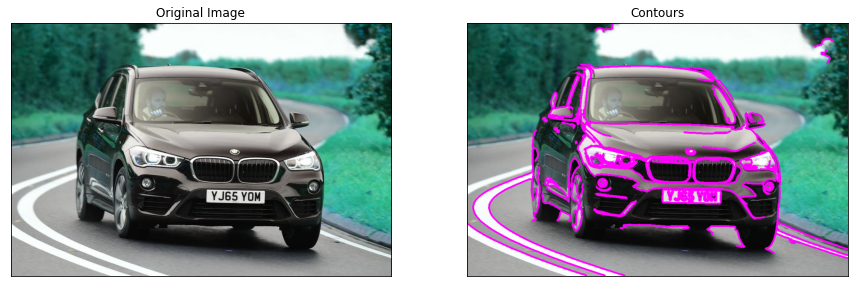

In [905]:
#plot images
plot_images(image, image_copy,title1='Original Image',title2='Contours')

In [906]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

In [907]:
print(cnts[0])

[[[521 445]]

 [[520 446]]

 [[520 460]]

 [[519 461]]

 [[519 477]]

 [[520 478]]

 [[520 479]]

 [[540 479]]

 [[541 480]]

 [[583 480]]

 [[584 481]]

 [[631 481]]

 [[632 482]]

 [[672 482]]

 [[673 481]]

 [[673 480]]

 [[674 479]]

 [[674 459]]

 [[675 458]]

 [[675 452]]

 [[674 451]]

 [[674 449]]

 [[673 449]]

 [[672 448]]

 [[635 448]]

 [[634 447]]

 [[587 447]]

 [[586 446]]

 [[544 446]]

 [[543 445]]]


In [908]:
len(cnts)

10

In [909]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

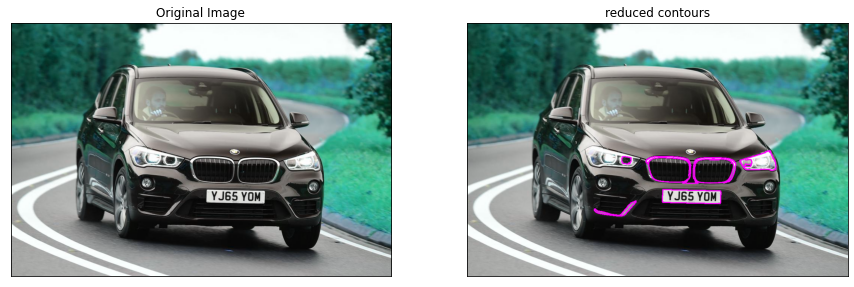

In [910]:
plot_images(image, image_copy,title1='Original Image',title2='reduced contours')

### Number Plate
- Detect plate boundaries
- plot plate

In [911]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

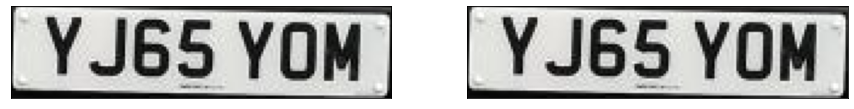

In [912]:
#Plot number plate
plot_images(plate,plate)

In [887]:
#install pytesseract
!pip install pytesseract

In [888]:
!pip install tesseract

### Pyhton Tesseract
- Python-tesseract is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.

In [913]:
import pytesseract
#convert image into string
text = pytesseract.image_to_string(plate, lang="eng")

### Print text

In [914]:
#print text of a number plate
print(text)

YJ65 YOM

